# Comparison of Model to Assay + Application

In this notebook, I am going to first plot how the output of our model
compares to the experimental data. I then go onto apply our model to 
probe the regulatory potential of all regions upstream of TSSs.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import models.models as models
%matplotlib inline

Using Theano backend.
Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5005)
/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [4]:
model = models.SequenceDNN_Regression.load("models/models/145_weighted.arch.json", "models/models/145_weighted.weights.h5")

In [38]:
from mrpa_data import MrpaData
data = MrpaData()

In [39]:
def quantile_plot(x, y, quantiles = 5000):
    data_pairs = sorted([(i, j) for i, j in zip(x, y)], key = lambda x: x[0])
    avg_activity, avg_score = [], []
    for i in range(0, len(data_pairs), len(data_pairs) / quantiles):
        index = range(i, min(i + (len(data_pairs) / quantiles), len(data_pairs)))
        activities = [data_pairs[j][0] for j in index]
        scores  = [data_pairs[j][1] for j in index]
        avg_activity.append(sum(activities) / float(len(activities)))
        avg_score.append(sum(scores) / float(len(scores)))
    plt.scatter(avg_activity, avg_score)
    plt.show()

# Run Model on experimentally tested sequences

In [ ]:
predictions = model.predict(data.X_one_hot())

In [ ]:
for i in range(4):
    plt.scatter(predictions[:, i], data.y_multitask()[: , i], s = .01)
    plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
for i in range(4):
    scaler = MinMaxScaler((-1, 1))
    quantile_plot(predictions[:, i], scaler.fit_transform(data.y_multitask()[: , i]))

# Same but only for test set

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
    data.X_one_hot(), data.y_multitask(), test_size=0.2, random_state=42
)

In [41]:
predictions_valid = model.predict(X_valid)

/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


0.0263964638432


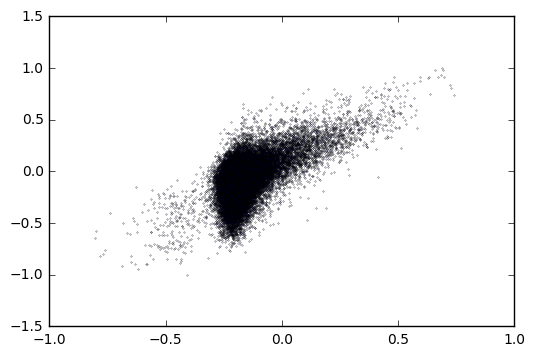

/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


0.0426243876173


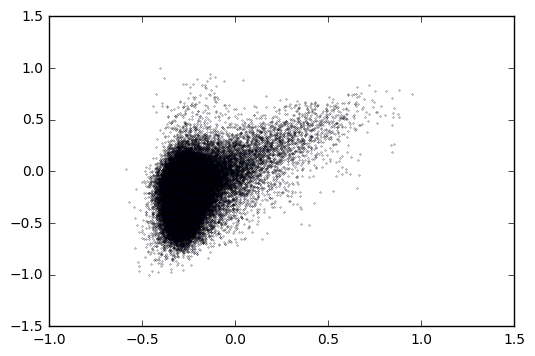

/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


0.0583485692615


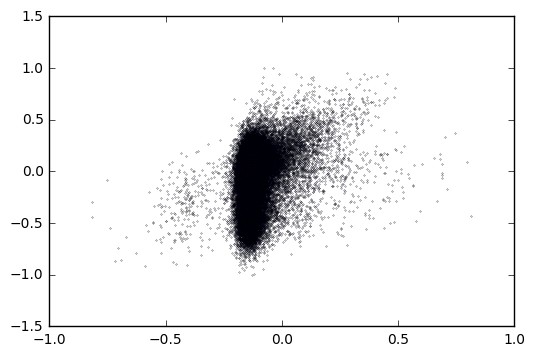

/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


0.104790738415


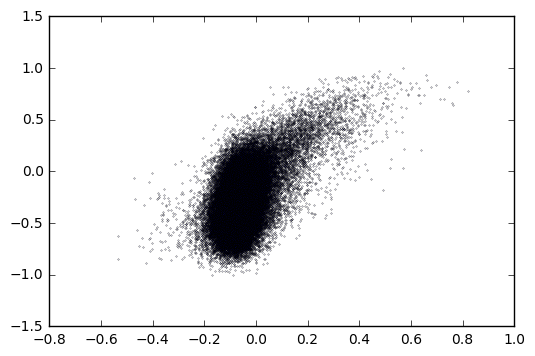

In [44]:

for i in range(4):
    scaler = MinMaxScaler((-1, 1))
    scaled = scaler.fit_transform(y_valid[: , i])
    plt.scatter(predictions_valid[:, i], scaled, s = .05)
    print sum([(i-j)**2 for i, j in zip(predictions_valid[:, i], scaled)]) / float(len(scaled))
    plt.show()

/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


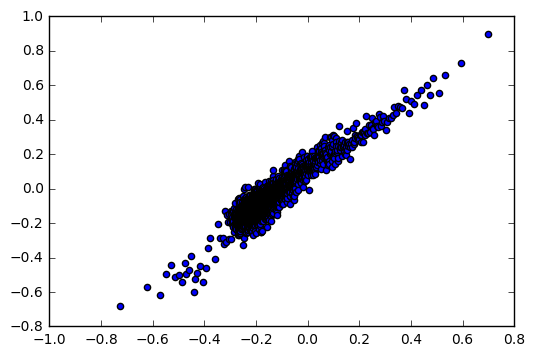

/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


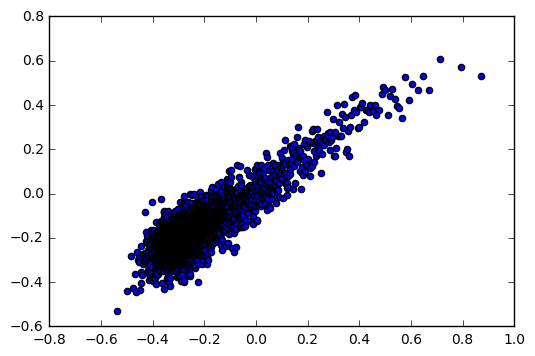

/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


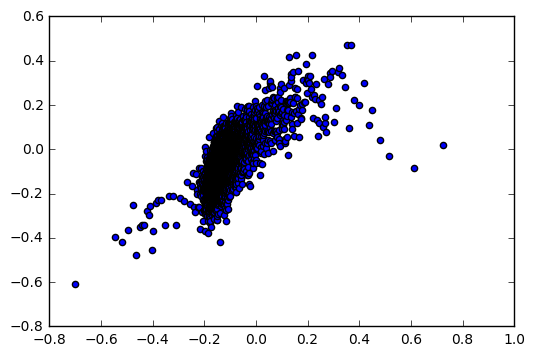

/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


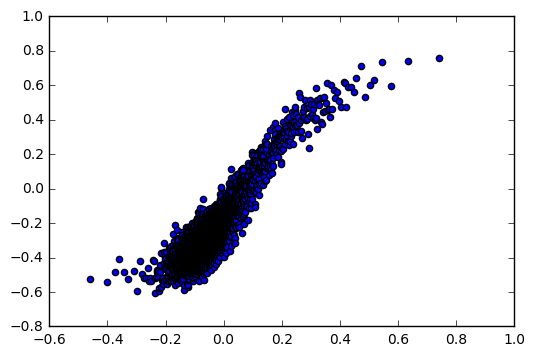

In [43]:
from sklearn.preprocessing import MinMaxScaler
for i in range(4):
    scaler = MinMaxScaler((-1, 1))
    quantile_plot(predictions_valid[:, i], scaler.fit_transform(y_valid[: , i]))

# Run Model on all promoter regions

In [35]:
import gzip
with gzip.open('../data/promoters/upstream5000.fa.gz') as f:
    seqs = {}
    cur_seq = ''
    region = ''
    for line in f:
        if line[0] == '>':
            if cur_seq:
                seqs[region] = data._one_hot_encode_seq(cur_seq)
            cur_seq = ''
            region = line[1:].split()[1]
            print region
            break
        else:
            cur_seq += line.strip().upper()

chr1:66994252-66999251


In [9]:
vals = []
stride = 29
for shift in range(0, 5000-145, stride):
    X = []
    for region, seq in seqs.items():
        X += [seq[:, shift:shift+145]]
    X = np.array(X).reshape(26110, 1, 4, 145)
    vals += [model.predict(X)]

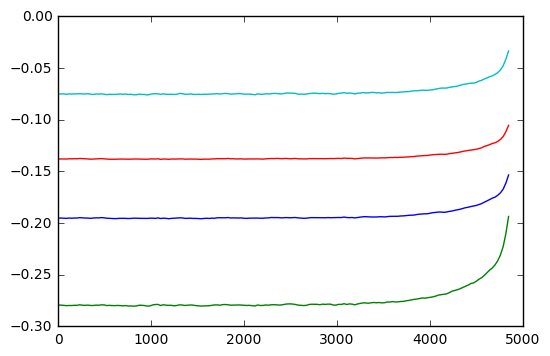

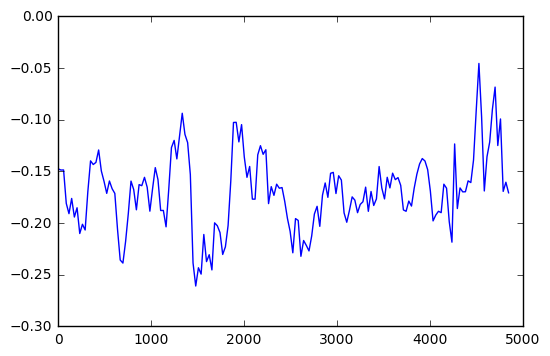

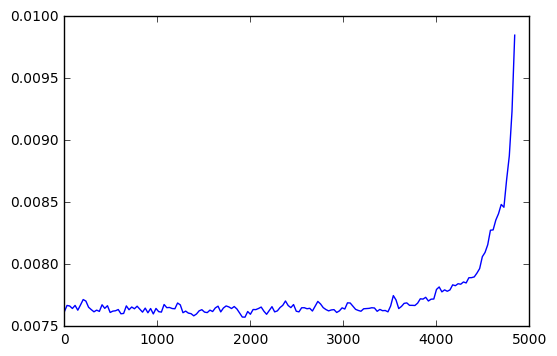

In [10]:
avgs = [sum(x) / float(len(x)) for x in vals]
plt.plot(range(0, 5000-145, stride), avgs)
plt.show()
meds = [np.median(x[0]) for x in vals]
plt.plot(range(0, 5000-145, stride), meds)
plt.show()
var = [np.var(x) for x in vals]
plt.plot(range(0, 5000-145, stride),var)
plt.show()

26110


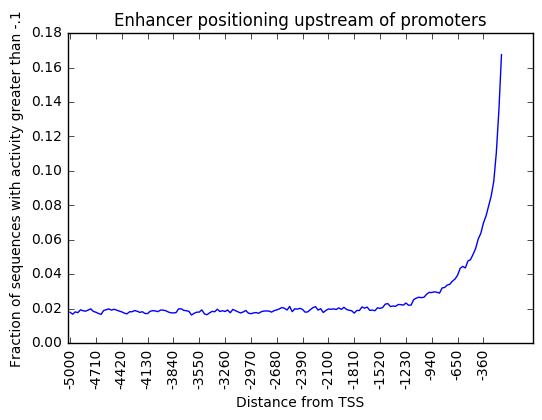

In [11]:
# Add a number of above a given cutoff
print len(vals[0])
thresh = [len(filter(lambda y: y[0] > -.1, x)) / float(len(x)) for x in vals]

plt.plot(range(1, len(range(0, 5000-145, stride))+1), thresh)
plt.xticks(range(1, len(range(0, 5000-145, stride))+1, 10), range(-5000, 0, stride*10), rotation='vertical')
plt.title('Enhancer positioning upstream of promoters')
plt.ylabel('Fraction of sequences with activity greater than -.1')
plt.xlabel('Distance from TSS')
plt.show()

26110


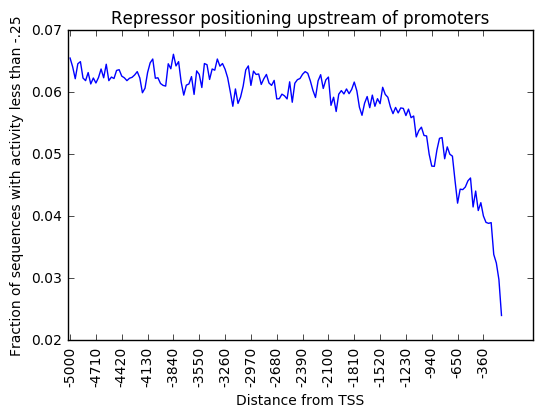

In [12]:
# Add a number of BELOW a given cutoff
print len(vals[0])
thresh = [len(filter(lambda y: y[0] < -.25, x)) / float(len(x)) for x in vals]

plt.plot(range(1, len(range(0, 5000-145, stride))+1), thresh)
plt.xticks(range(1, len(range(0, 5000-145, stride))+1, 10), range(-5000, 0, stride*10), rotation='vertical')
plt.title('Repressor positioning upstream of promoters')
plt.ylabel('Fraction of sequences with activity less than -.25')
plt.xlabel('Distance from TSS')
plt.show()

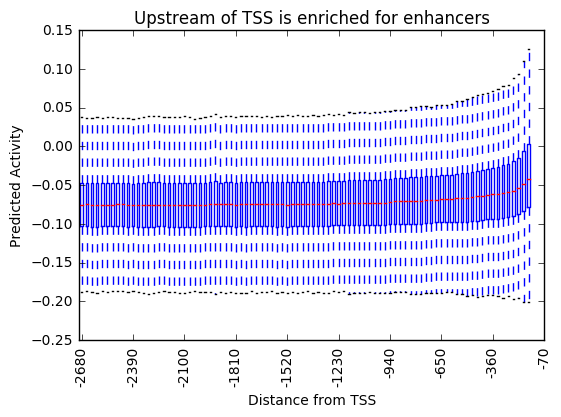

In [13]:
skip = 80

plt.boxplot([val[:, 3] for val in vals[skip:]], showfliers=False)
plt.xticks(range(1, len(range(0, 5000-stride*skip, stride))+1, 10),
           range(-5000+stride*skip, 0, stride*10), rotation='vertical')
plt.title('Upstream of TSS is enriched for enhancers')
plt.ylabel('Predicted Activity')
plt.xlabel('Distance from TSS')
plt.show()

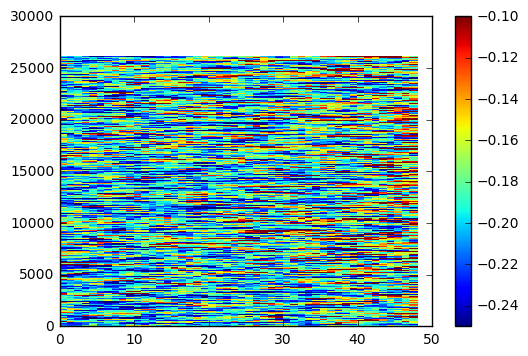

In [33]:
import numpy as np
data = np.vstack([[val[0] for val in rows] for rows in vals[120:]]).T
heatmap = plt.pcolor(data)
plt.clim(-0.25,-0.1)
plt.colorbar(heatmap)
plt.show()

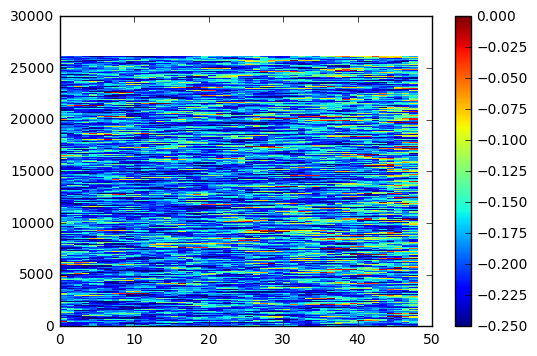

In [34]:
heatmap = plt.pcolor(data)
plt.clim(-0.25, 0)
plt.colorbar(heatmap)
plt.show()